In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 5.0 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3144554 sha256=59f79689a4601167bc23b3062b68b9296cc3135cc274bb674171df71e5dbf184
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
#!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.bin.gz -d "/content/drive/MyDrive/Thesis"

In [ ]:
#pip install bnlp_toolkit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
np.random.seed(42)

CPU times: user 2.45 s, sys: 406 ms, total: 2.86 s
Wall time: 3.27 s


In [ ]:
!gunzip '/content/drive/MyDrive/Thesis/bengali_fasttext_wiki.zip' -d '/content/drive/MyDrive/Thesis/'

gzip: /content/drive/MyDrive/Thesis/bengali_fasttext_wiki.zip: unknown suffix -- ignored
gzip: /content/drive/MyDrive/Thesis/ is a directory -- ignored


In [ ]:

#read Data
data =pd.read_excel('/content/drive/MyDrive/Thesis/BenFEDAS.xlsx')
data_df = data[:][0:6478]
text_data = data_df["text"]
labels = data_df["label2"]
classes = data_df['class2']

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:211: UserWarning: Cell E4661 is marked as a date but the serial value 6691519.586805556 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


#4 DAS

In [ ]:
def make_four_label_droping(data_df):
  tag_list = []
  text_list = []
  for i in range(len(data_df)):
      if (data_df.class2[i] == 'anger' or data_df.class2[i] ==  'disapproval' or data_df.class2[i] == 'disgust'): 
        tag = "mild"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
      elif (data_df.class2[i] == 'fear' or data_df.class2[i] ==  'nervousness' or data_df.class2[i] ==  'embarrassment' or data_df.class2[i] ==  'remorse'): 
        tag = "moderate"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
      elif (data_df.class2[i] == 'sadness' or data_df.class2[i] == 'disappointment'): 
        tag = "severe"
        tag_list.append(tag)
        text_list.append(data_df.text[i])
      elif(data_df.class2[i] == 'joy' or data_df.class2[i] ==  'love' or data_df.class2[i] ==   'approval'or data_df.class2[i] ==  'amusement' ):
        tag = "no"      
        tag_list.append(tag)
        text_list.append(data_df.text[i])
  
  new_df = pd.DataFrame(list(zip(text_list, tag_list)), columns = ['text', 'label'])   

  return new_df
new_df = make_four_label_droping(data_df)

# 6 Ekman

In [ ]:
def make_6_emotion(data_df):
  tag_list = []
  for i in range(len(data_df)):
      if (data_df.class2[i] == 'anger' or data_df.class2[i] ==  'disapproval' or data_df.class2[i] == 'disgust'): 
        tag = "anger"
        tag_list.append(tag)
      elif (data_df.class2[i] == 'fear' or data_df.class2[i] ==  'nervousness'): 
        tag = "fear"
        tag_list.append(tag)
      elif (data_df.class2[i] == 'sadness' or data_df.class2[i] == 'disappointment'or data_df.class2[i] ==  'embarrassment' or data_df.class2[i] ==  'remorse'): 
        tag = "sadness"
        tag_list.append(tag)
      elif (data_df.class2[i] == 'surprise' or data_df.class2[i] ==   'confusion'): 
        tag = "surprise"
        tag_list.append(tag)
      elif (data_df.class2[i] ==  'neutral'):

        tag = "neutral"
        tag_list.append(tag)
      else:
        tag = "joy"      
        tag_list.append(tag)   
  data_df['label'] = tag_list 
  return data_df
new_df = make_6_emotion(data_df)

In [ ]:
new_df.tail(5)

In [ ]:
text_data = new_df["text"]
labels = new_df["label"]
tokenizer = Tokenizer(num_words= 15000)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen = 196)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
labels = label.fit_transform(labels)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, shuffle = False, random_state=42)
#train_data, sp_data, train_labels, sp_labels = train_test_split(text_data, labels, test_size=0.4, shuffle = False, random_state=42)
#val_data, test_data, val_labels, test_labels = train_test_split(sp_data, sp_labels, test_size=0.5, shuffle = False, random_state=42)

In [ ]:
import fasttext
import fasttext.util
fasttext.util.download_model('bn', if_exists='ignore')  # Bengali
model = fasttext.load_model("/content/cc.bn.300.bin")
unique_words = len(word_index)

In [ ]:
embedding_dim =300
total_words = unique_words +1
skipped_words = 0
embedding_matrix = np.zeros((total_words, embedding_dim))

for word, index in tokenizer.word_index.items():
  try:
    embedding_vector = model[word]
  except:

    skipped_words = skipped_words +1
    pass
  if embedding_vector is not  None:
    embedding_matrix[index] = embedding_vector  

In [ ]:
from tensorflow.keras.layers import *
embedding_layer = Embedding(total_words, embedding_dim, weights =[embedding_matrix], input_length =196, trainable = True)
lr =tf.keras.optimizers.Adam(
    learning_rate= 1e-04,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam"
)
model =  tf.keras.Sequential([
                              embedding_layer, 
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                              tf.keras.layers.Dropout(0.8),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dropout(0.8),
                              tf.keras.layers.Dense(32,kernel_regularizer=regularizers.l2(0.01),activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer=lr,metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer=lr,metrics=['accuracy'])
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
tensorboard_callback  = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(train_data,  train_labels, epochs=50, batch_size =32, validation_data=(test_data, test_labels),validation_batch_size =16,callbacks=[tensorboard_callback], verbose=2)

In [ ]:

from tensorflow.keras.layers import *
embedding_layer = Embedding(total_words, embedding_dim, weights =[embedding_matrix], input_length =196, trainable = True)
lr =tf.keras.optimizers.Adam(
    learning_rate= 1e-04,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam"
)
model =  tf.keras.Sequential([
   embedding_layer, 
    tf.keras.layers.Bidirectional(GRU(128,dropout=0.2)),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')])
                              
                            
model.compile(loss='sparse_categorical_crossentropy',optimizer=lr,metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=lr,metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
tensorboard_callback  = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
num_epochs = 50
history = model.fit(train_data, train_labels,epochs=num_epochs, batch_size =32, validation_data=(test_data, test_labels), validation_batch_size =16, callbacks=[tensorboard_callback], verbose=2)

Epoch 1/50
137/137 - 8s - loss: 1.3737 - accuracy: 0.3101 - val_loss: 1.3092 - val_accuracy: 0.3853 - 8s/epoch - 55ms/step
Epoch 2/50
137/137 - 4s - loss: 1.3298 - accuracy: 0.3709 - val_loss: 1.2451 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 3/50
137/137 - 4s - loss: 1.3194 - accuracy: 0.3766 - val_loss: 1.2313 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 4/50
137/137 - 4s - loss: 1.3125 - accuracy: 0.3865 - val_loss: 1.2214 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 5/50
137/137 - 4s - loss: 1.3134 - accuracy: 0.3761 - val_loss: 1.2228 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 6/50
137/137 - 4s - loss: 1.3031 - accuracy: 0.3817 - val_loss: 1.2087 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 7/50
137/137 - 4s - loss: 1.2942 - accuracy: 0.3888 - val_loss: 1.2075 - val_accuracy: 0.3853 - 4s/epoch - 26ms/step
Epoch 8/50
137/137 - 4s - loss: 1.2867 - accuracy: 0.3915 - val_loss: 1.1959 - val_accuracy: 0.3872 - 4s/epoch - 28ms/step
Epoch 9/50
137/1

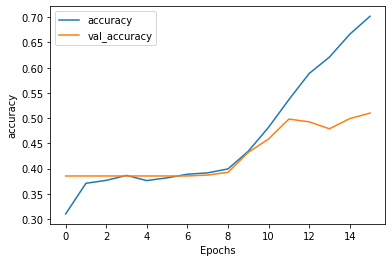

In [ ]:
## অ্যাক্যুরেসি  ম্যাটপ্লটলিব দিয়ে

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig("/content/drive/MyDrive/Thesis/fasttext/fix196l_300e_Accuracy_e-4_.01reg.8.8dropout_GRU__4DAS_.2test_bilstm drop.jpg",format = 'jpg',dpi = 1000)
  
plot_graphs(history, "accuracy")


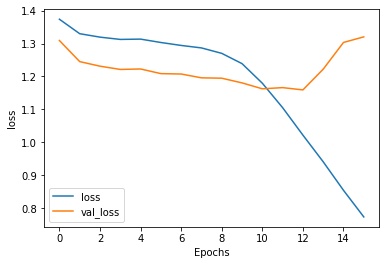

In [ ]:
##  লস, ম্যাটপ্লটলিব দিয়ে

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig("/content/drive/MyDrive/Thesis/fasttext/fix196l_300e_loss_e-4_.01reg.8.8dropout GRU__4DAS_.2test_bilstm drop.jpg",format = 'jpg',dpi = 1000)
  
plot_graphs(history, "loss")




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
ypred = model.predict(test_data, verbose=2)
ypred = np.argmax(ypred, axis=1)
print(classification_report(test_labels, ypred))
confusion_matrix(test_labels, ypred)


35/35 - 1s - 955ms/epoch - 27ms/step
              precision    recall  f1-score   support

           0       0.36      0.23      0.28       127
           1       0.00      0.00      0.00        64
           2       0.57      0.53      0.55       479
           3       0.48      0.65      0.55       420

    accuracy                           0.51      1090
   macro avg       0.35      0.35      0.35      1090
weighted avg       0.48      0.51      0.49      1090



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 29,   0,  40,  58],
       [  6,   0,  24,  34],
       [ 26,   0, 254, 199],
       [ 19,   0, 128, 273]])

In [ ]:
embedding_vector = word_embedding['বাংলা']

In [ ]:
print(model['বাংলা']) 

In [ ]:
unique_words = len

In [ ]:
from bnlp.embedding.fasttext import BengaliFasttext

bft = BengaliFasttext()
word = "গ্রাম"
#model_path = "/content/drive/MyDrive/Thesis/Thesis Code/cc.bn.300.bin"
word_vector = model.bft.generate_word_vector( word)
print(word_vector.shape)
print(word_vector)